In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install -q transformers tweepy matplotlib wordcloud


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Importing the libraries
import configparser
import tweepy
import tqdm

In [6]:
# PLEASE READ THE FOLLOWING EXPLANATION 

# User needs to create a config file in the following format
#[twitter]
#api_key = Enter your api_key here
#api_key_secret = Enter your api_key_secret here
#access_token = Enter your access_token here
#access_token_secret = Enter your access_token_secret here

#FOR OUR ANALYSIS WE ARE COLLECTING THE DATA AND SAVING IT AS A CSV. THEN WE ARE MANIPULATING THE DATA AND UPLOADING IT AGAIN FOR TH TOPIC MODELING. 
#THEREFORE, EVEN IF YOU DO NOT HAVE YOUR API_KEY YOU CAN USE OUR 'Twitter_After_Polarity_topicmodelling.xlsx' EXCEL FILE
#WHICH IS SEPERATELY SHARED TO UPLOAD BELOW TO SEE THE TOPIC MODELING ANALYSIS

config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [8]:
# Read the values
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [9]:
# Authenticate
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [10]:
# using get_user with screen_name - Canada Goose
put_your_screen_name = "canadagoose"
user1 = api.get_user(screen_name=put_your_screen_name)
user1.id

54886503

In [11]:
import os
import pandas as pd

In [12]:
#hashtags to scrape
hashtag = ["CanadaGoose"]

#to ensure there is tweet from different months
date_interval = ["2021-03-01", "2021-04-01", "2022-11-28"]

In [13]:
data = None
for i in range(len(date_interval)-1):
    for hash in hashtag:
        os.system(
            f'snscrape --jsonl --progress --max-results 5000 --since {date_interval[i]} twitter-hashtag "{hash} until:{date_interval[i+1]}" > text-query-tweets.json')
        tweets_df = pd.read_json('text-query-tweets.json', lines=True)
        df = tweets_df[["id", "url", "date", "content",
                        "hashtags", "cashtags", "media", "lang"]]
        if data is None:
            data = df
        else:
            data = data.append(df)

C:\Users\ilter\AppData\Local\Temp\ipykernel_14028\3250594078.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4708 entries, 0 to 4406
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   id        4708 non-null   int64              
 1   url       4708 non-null   object             
 2   date      4708 non-null   datetime64[ns, UTC]
 3   content   4708 non-null   object             
 4   hashtags  4705 non-null   object             
 5   cashtags  31 non-null     object             
 6   media     2845 non-null   object             
 7   lang      4708 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 331.0+ KB


In [17]:
data.to_csv('CanadaGoose_data1.csv')

In [18]:
import pandas as pd 

tweets = pd.read_excel('Twitter_After_Polarity_topicmodelling.xlsx')

In [19]:
!pip install pyLDAvis


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

(3443, 263)


In [22]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

(3443, 263)


C:\Users\ilter\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


In [23]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =3, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =3, random_state=50)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=3, random_state=50)

In [24]:
#for i,topic in enumerate(lda_tf.components_):
#print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#print('\n')
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['plz', 'board', 'sign', 'change', 'nan', 'loving', 'items', 'share', 'good', 'check']


Top 10 words for topic #1:
['snacks', 'park', 'need', 'know', 'happy', 'macmillan', 'day', 'parka', 'goose', 'canada']


Top 10 words for topic #2:
['friends', 'amp', 'time', 'goslings', 'black', 'urge', 'ditch', 'new', 'jacket', 'geese']




C:\Users\ilter\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\ilter\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.396049 -0.006679       1        1  35.395423
1      0.205963 -0.246574       2        1  34.128186
2      0.190086  0.253253       3        1  30.476390, topic_info=       Term        Freq       Total Category  logprob  loglift
27   canada  885.000000  885.000000  Default  30.0000  30.0000
92    goose  825.000000  825.000000  Default  29.0000  29.0000
90     good  742.000000  742.000000  Default  28.0000  28.0000
31    check  769.000000  769.000000  Default  27.0000  27.0000
197   share  736.000000  736.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
227   today   37.356133   62.231138   Topic3  -4.5952   0.6779
71   family   31.351735   38.776210   Topic3  -4.7704   0.9757
122    like   38.605466   73.904872   Topic3  -4.5623   0.5388
113    just   32.917202   56.277354   Topic3  -4.7217   0.6519
164   parka   34.770203  168.810062   Topic3  -4.6670  -0.3918

[164 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         2  0.970012  afternoon
2         2  0.172793        amp
2         3  0.816838        amp
3         2  0.840656     animal
3         3  0.093406     animal
...     ...       ...        ...
251       3  0.936770    weekend
253       2  0.979248       weve
255       2  0.936556       wild
258       2  0.276861     winter
258       3  0.711929     winter

[169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [26]:
tweets_1=tweets.replace({0:'', 1:'',2:''})

In [27]:
from matplotlib import pyplot as plt

In [28]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

(3443, 3)

In [29]:
tweets_1['Topic'] = topic_values.argmax(axis=1)

In [30]:
tweets['Topic'] = topic_values.argmax(axis=1)

C:\Users\ilter\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ilter\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\ilter\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 2880x1800 with 0 Axes>

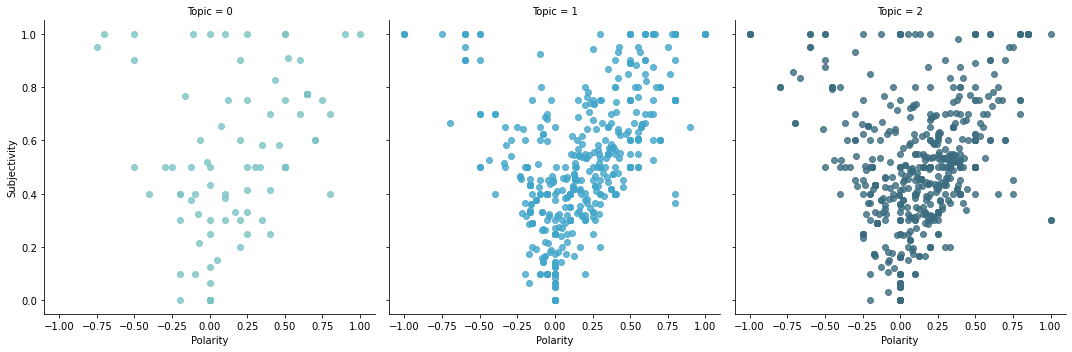

In [31]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=tweets, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()